In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('autos.csv')

In [3]:
df.head()

,symbol,loss,make,fuel,aspir,doors,style,drive,eng_loc,wb,...,eng_cc,fuel.sys,bore,stroke,comp.ratio,hp,rpm,city_mpg,hw_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    object 
 3   fuel        205 non-null    object 
 4   aspir       205 non-null    object 
 5   doors       203 non-null    object 
 6   style       205 non-null    object 
 7   drive       205 non-null    object 
 8   eng_loc     205 non-null    object 
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    object 
 15  cylinders   205 non-null    object 
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    object 
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symbol,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
loss,NaN,NaN,NaN,164.0,164.0,NaN,158.0,NaN,158.0,NaN,...,74.0,103.0,74.0,103.0,74.0,95.0,95.0,95.0,95.0,95.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspir,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
eng_loc,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wb,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [6]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [7]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
LE = LabelEncoder()

In [9]:
df['make'] = LE.fit_transform(df['make'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    int64  
 3   fuel        205 non-null    object 
 4   aspir       205 non-null    object 
 5   doors       203 non-null    object 
 6   style       205 non-null    object 
 7   drive       205 non-null    object 
 8   eng_loc     205 non-null    object 
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    object 
 15  cylinders   205 non-null    object 
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    object 
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [11]:
df['fuel'].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
df['fuel'] = LE.fit_transform(df['fuel'])

In [13]:
df['aspir'].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
df['aspir'] = LE.fit_transform(df['aspir'])

In [15]:
df['doors'].unique()

array(['two', 'four', nan], dtype=object)

In [16]:
df['doors'] = LE.fit_transform(df['doors'])

In [17]:
df['style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
df['style'] = LE.fit_transform(df['style'])

In [19]:
df['drive'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
df['drive'] = LE.fit_transform(df['drive'])

In [21]:
df['eng_loc'].unique()

array(['front', 'rear'], dtype=object)

In [22]:
df['eng_loc'] = LE.fit_transform(df['eng_loc'])

In [23]:
df['eng_type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
df['eng_type'] = LE.fit_transform(df['eng_type'])

In [25]:
df['cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [26]:
df['cylinders'] = LE.fit_transform(df['cylinders'])

In [27]:
df['fuel.sys'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [28]:
df['fuel.sys'] = LE.fit_transform(df['fuel.sys'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    int64  
 3   fuel        205 non-null    int64  
 4   aspir       205 non-null    int64  
 5   doors       205 non-null    int64  
 6   style       205 non-null    int64  
 7   drive       205 non-null    int64  
 8   eng_loc     205 non-null    int64  
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    int64  
 15  cylinders   205 non-null    int64  
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    int64  
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [30]:
df.isna().sum()

symbol         0
loss          41
make           0
fuel           0
aspir          0
doors          0
style          0
drive          0
eng_loc        0
wb             0
length         0
width          0
height         0
weight         0
eng_type       0
cylinders      0
eng_cc         0
fuel.sys       0
bore           4
stroke         4
comp.ratio     0
hp             2
rpm            2
city_mpg       0
hw_mpg         0
price          4
dtype: int64

In [31]:
df['loss'] = df['loss'].fillna(df['loss'].median())

In [32]:
df['bore'] = df['bore'].fillna(df['bore'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['hp'] = df['hp'].fillna(df['hp'].median())
df['rpm'] = df['rpm'].fillna(df['rpm'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [33]:
df.isna().sum()

symbol        0
loss          0
make          0
fuel          0
aspir         0
doors         0
style         0
drive         0
eng_loc       0
wb            0
length        0
width         0
height        0
weight        0
eng_type      0
cylinders     0
eng_cc        0
fuel.sys      0
bore          0
stroke        0
comp.ratio    0
hp            0
rpm           0
city_mpg      0
hw_mpg        0
price         0
dtype: int64

<AxesSubplot:>

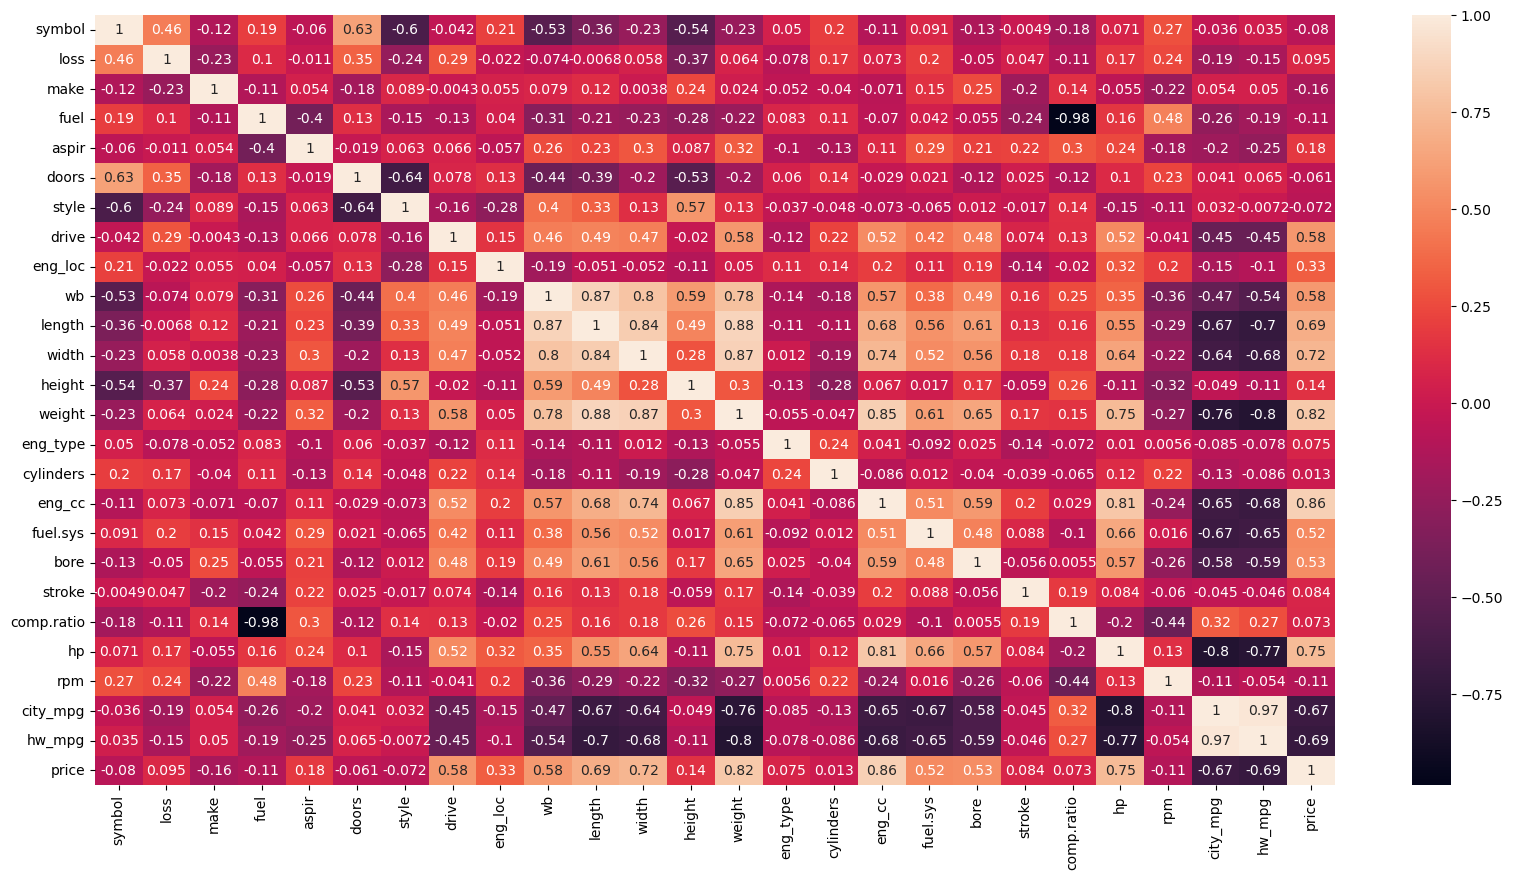

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

In [35]:
df.drop(['symbol','loss','make','fuel','aspir','doors','style','drive','eng_loc','wb','height',
         'eng_type','cylinders','fuel.sys','bore','stroke','comp.ratio','rpm','city_mpg','hw_mpg'], axis = 1,inplace = True)

In [36]:
df

,length,width,weight,eng_cc,hp,price
0,168.8,64.1,2548,130,111.0,13495.0
1,168.8,64.1,2548,130,111.0,16500.0
2,171.2,65.5,2823,152,154.0,16500.0
3,176.6,66.2,2337,109,102.0,13950.0
4,176.6,66.4,2824,136,115.0,17450.0
...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114.0,16845.0
201,188.8,68.8,3049,141,160.0,19045.0
202,188.8,68.9,3012,173,134.0,21485.0
203,188.8,68.9,3217,145,106.0,22470.0


<AxesSubplot:>

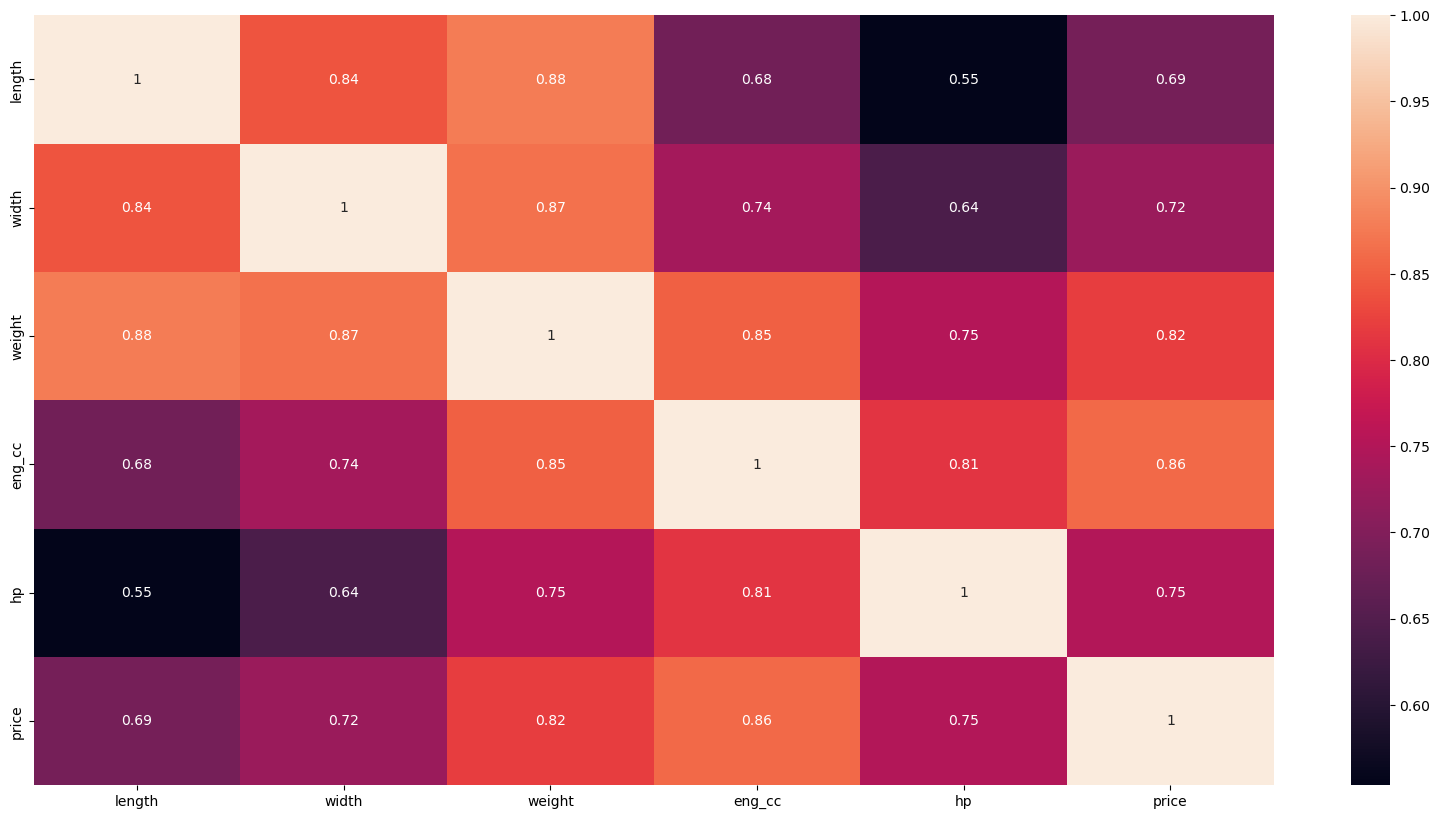

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

In [38]:
x = df.drop(['price'], axis = 1)

In [39]:
y = df['price']

In [40]:
x

,length,width,weight,eng_cc,hp
0,168.8,64.1,2548,130,111.0
1,168.8,64.1,2548,130,111.0
2,171.2,65.5,2823,152,154.0
3,176.6,66.2,2337,109,102.0
4,176.6,66.4,2824,136,115.0
...,...,...,...,...,...
200,188.8,68.9,2952,141,114.0
201,188.8,68.8,3049,141,160.0
202,188.8,68.9,3012,173,134.0
203,188.8,68.9,3217,145,106.0


In [41]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [43]:
linear_model = LinearRegression()

In [44]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = linear_model.predict(x_test)

In [46]:
y_pred

array([ 6449.9100523 ,  7130.99843282,  6285.75960155,  5628.82698691,
        9472.99005244, 23698.87564691,  6932.92943223,   -87.37323297,
        6211.80471128, 12016.80091843, 15105.91517404, 16440.4221313 ,
       16685.07316228,  9855.39572012, 17549.26111772, 15564.7962305 ,
        9235.91911439,  6140.35786476, 14110.63702162, 10704.60997163,
       11831.37460497,  5677.21420088, 10150.28705737,  7715.41305169,
       15186.14719232,  6187.68899453, 17889.45361296,  8089.76663324,
        5955.34697094,  6540.32512079,  7676.81524558, 11865.9702488 ,
       26244.52117242, 13801.73922578, 18592.33804083,  8080.89204641,
        7901.77937517, 34150.53753216,  7914.28152204, 17211.20613016,
        6868.12584477])

In [47]:
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error is: {mse}')

Mean Squared Error is: 13970779.669254445


In [48]:
rmse = np.sqrt(mse)
rmse

3737.7506162469485

In [49]:
mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error is: {mae}')

Mean Absolute Error is: 2422.1026909397033


In [50]:
r2score = r2_score(y_test,y_pred)
print(f'R2 Score is: {r2score}')

R2 Score is: 0.7449587159446662
